# About Dataset
The dataset is in .xlsx (Microsoft Excel) format and consists of ```5961 rows``` with ```7 features``` as explained below:
1. **Qualification:** Qualification and degrees held by the doctor.
2. **Experience:** Experience of the doctor in number of years.
3. **Rating:** Rating given by patients.
4. **Profile:** Type of the doctor.
5. **Miscellaeous_Info:** Extra information about the doctor.
6. **Fees:** Fees charged by the doctor.
7. **Place:** Area and the city where the doctor is located.
Since, the target feature ```Fees``` is of **continueous type**, therefore, it is a **Regression Problem**.

# Loading Dataset

In [1]:
import pandas as pd
df_docf = pd.read_excel('Final_Train.xlsx',sheet_name='Sheet1')
#Interpreting dataset
df_docf

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [2]:
#Checking Dimension
df_docf.shape

(5961, 7)

### Remarks:
- There are **5961 rows and 7 columns**.

In [3]:
#Checking general information
df_docf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


### Remarks:
- There are 1 continueous and **6 discrete features which needs to be treated accordingly**.
- Feature ```Rating```, ```Place``` and ```Miscellaneous_Info``` contains **null values and needs to be treated accordingly**.

# Preparing Dataset

In [4]:
import re
#Copying dataset to new dataframe object
df = df_docf.copy()

### **Feature ```Qualification```**

In [5]:
#Checking feature Qualification for further analysis
x = 'Qualification'

#Checking values for any patterns in it.
df[x].head(20)

0                                 BHMS, MD - Homeopathy
1                          BAMS, MD - Ayurveda Medicine
2                        MBBS, MS - Otorhinolaryngology
3                                   BSc - Zoology, BAMS
4                                                  BAMS
5                                                  BAMS
6                                                  BHMS
7                                                   BDS
8                           MBBS, MD - General Medicine
9                                              BSc, BDS
10                                  MBBS, MS, DNB - ENT
11                                                 BAMS
12                                             BDS, MDS
13              BDS, MDS - Oral & Maxillofacial Surgery
14    MBBS, Diploma in Otorhinolaryngology (DLO), DN...
15                          MBBS, MD - General Medicine
16           MBBS, Diploma in Otorhinolaryngology (DLO)
17                                 MBBS, MF- Hom

### Remarks:
- Values are stored in form of degree and profile, therefore, seperating them into different columns of their degrees.

In [6]:
#Preparing list of degrees
deg = ['MS','MD','MF','MDS','MBBS','BDS','BAMS','BHMS','DNB']
pgd = ['PGD','Post Graduate','Diploma']
bsc = ['BSc','B.Sc']

#Seperating using deg first
for i in deg:
    temp = 'is_'+i
    df[temp] = df[x].str.contains(i)
    df[temp] = df[temp].apply(lambda x: 'Yes' if x==True else 'No')

#Seperating using pgd
for i in pgd:
    df[i] = df[x].str.contains(i)
    
df['is_Diploma'] = df[pgd].any(axis=1)
df.drop(columns=pgd,inplace=True)
df['is_Diploma'] = df['is_Diploma'].apply(lambda x: 'Yes' if x==True else 'No')

#Seperating using bsc
for i in bsc:
    df[i] = df[x].str.contains(i)
    
df['is_BSc'] = df[bsc].any(axis=1)
df.drop(columns=bsc,inplace=True)
df['is_BSc'] = df['is_BSc'].apply(lambda x: 'Yes' if x==True else 'No')


#Interpreting dataset after spliting of feature Qualification
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,is_MS,is_MD,is_MF,is_MDS,is_MBBS,is_BDS,is_BAMS,is_BHMS,is_DNB,is_Diploma,is_BSc
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Yes,Yes,No,No,No,No,No,Yes,No,No,No
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Yes,Yes,No,No,No,No,Yes,No,No,No,No
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Yes,No,No,No,Yes,No,No,No,No,No,No
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Yes,No,No,No,No,No,Yes,No,No,No,Yes
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Yes,No,No,No,No,No,Yes,No,No,No,No


### **Feature ```Experience```**

In [7]:
#Checking feature Experience for further analysis
x = 'Experience'

df[x].head(20)

0     24 years experience
1     12 years experience
2      9 years experience
3     12 years experience
4     20 years experience
5      8 years experience
6     42 years experience
7     10 years experience
8     14 years experience
9     23 years experience
10     5 years experience
11     7 years experience
12     9 years experience
13    21 years experience
14    12 years experience
15    10 years experience
16    24 years experience
17     5 years experience
18    19 years experience
19    19 years experience
Name: Experience, dtype: object

### Remarks:
- Value is in format (xx years experience), therefore, extracting xx and storing it in another column.

In [8]:
#Extracting numbers from feature Experience and storing it in another column
reg = '\.*(\d{0,9})\.*'
df['n_Experience']=df[x].str.extract(reg).astype('int64')

#Interpreting dataset after spliting of feature Experience
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,is_MS,is_MD,is_MF,is_MDS,is_MBBS,is_BDS,is_BAMS,is_BHMS,is_DNB,is_Diploma,is_BSc,n_Experience
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Yes,Yes,No,No,No,No,No,Yes,No,No,No,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Yes,Yes,No,No,No,No,Yes,No,No,No,No,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Yes,No,No,No,Yes,No,No,No,No,No,No,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Yes,No,No,No,No,No,Yes,No,No,No,Yes,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Yes,No,No,No,No,No,Yes,No,No,No,No,20


### **Feature ```Ratings```**

In [9]:
#Checking feature Ratings for further analysis
x = 'Rating'
df[x].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

### Remarks:
- Value is in format (xx%), therefore, extracting xx and storing it in another column.

In [10]:
#Extracting numbers from feature Rating and storing it in another column
reg = '\.*(\d{0,9})\.*'
df['n_Rating']=df[x].str.extract(reg)

#Interpreting feature Rating after spliting
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,is_MS,is_MD,is_MF,is_MDS,is_MBBS,is_BDS,is_BAMS,is_BHMS,is_DNB,is_Diploma,is_BSc,n_Experience,n_Rating
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Yes,Yes,No,No,No,No,No,Yes,No,No,No,24,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Yes,Yes,No,No,No,No,Yes,No,No,No,No,12,98
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Yes,No,No,No,Yes,No,No,No,No,No,No,9,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Yes,No,No,No,No,No,Yes,No,No,No,Yes,12,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Yes,No,No,No,No,No,Yes,No,No,No,No,20,100


### **Feature ```Place```**

In [11]:
#Checking feature Place for further analysis
x = 'Place'
df[x].head(20)

0                   Kakkanad, Ernakulam
1                 Whitefield, Bangalore
2            Mathikere - BEL, Bangalore
3          Bannerghatta Road, Bangalore
4                 Keelkattalai, Chennai
5                        Porur, Chennai
6                     Karol Bagh, Delhi
7                    Arekere, Bangalore
8                   Old City, Hyderabad
9                     Athani, Ernakulam
10             Thousand Lights, Chennai
11                Somajiguda, Hyderabad
12    Coimbatore Racecourse, Coimbatore
13             Jubilee Hills, Hyderabad
14                        Kondli, Delhi
15              Saroor Nagar, Hyderabad
16               Tambaram West, Chennai
17                Purasawakkam, Chennai
18                      KPHB, Hyderabad
19                HSR Layout, Bangalore
Name: Place, dtype: object

### Remarks:
- Values stored are in format (Area, City), therefore, spliting them into two different columns

In [12]:
#Seperating feature Place into columns area_Place and city_Place
temp_df = df[x].str.split(',',expand=True)
df['area_Place'] = temp_df[0].str.strip()
df['city_Place'] = temp_df[1].str.strip()

#Checking values in temp_df[2] and replace city_Place with it.
t = temp_df[temp_df[2] == ' Delhi']
df['city_Place'][t.index]=t[2].str.strip()
print(df['city_Place'].value_counts())
#Interpreting dataset after spliting of Place
df.head()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: city_Place, dtype: int64


<ipython-input-12-353aefb438d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_Place'][t.index]=t[2].str.strip()


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,is_MS,is_MD,is_MF,...,is_BDS,is_BAMS,is_BHMS,is_DNB,is_Diploma,is_BSc,n_Experience,n_Rating,area_Place,city_Place
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Yes,Yes,No,...,No,No,Yes,No,No,No,24,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Yes,Yes,No,...,No,Yes,No,No,No,No,12,98,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Yes,No,No,...,No,No,No,No,No,No,9,NaN,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Yes,No,No,...,No,Yes,No,No,No,Yes,12,NaN,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Yes,No,No,...,No,Yes,No,No,No,No,20,100,Keelkattalai,Chennai


### **Feature ```Profile```**

In [13]:
#Checking feature Profile for further analysis
x = 'Profile'
df[x].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

### Remarks:
- Value stored is in categorical form, therefore, needs to be encoded before model training.

### **Feature ```Miscellaneous_Info```**

In [14]:
#Checking feature Miscellaneous_Info for further analysis
x = 'Miscellaneous_Info'
print(df[x].head(30))
print(df[x].tail(30))

0                  100% 16 Feedback Kakkanad, Ernakulam
1                 98% 76 Feedback Whitefield, Bangalore
2                                                   NaN
3     Bannerghatta Road, Bangalore ₹250 Available on...
4                 100% 4 Feedback Keelkattalai, Chennai
5                                                   NaN
6                                                   NaN
7     Dental Fillings Crowns and Bridges Fixing Impa...
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12    98% 14 Feedback Coimbatore Racecourse, Coimbatore
13        Dental Crowns Facet Dental Dental prophylaxis
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              

### Remarks:
- Most of the values contains Ratings and Feedback while some contains kind of treatment provided as well as area and city, therefore, **extracting feedback** will be useful as others can also be conveyed by feature place and profile.

In [15]:
#Extracting number of feedbacks from feature Miscellaneous_Info and storing it into column n_Feedback
x='Miscellaneous_Info'
reg = '\.*(\d{0,9})\sFeedback\.*'
temp = df[x].str.extract(reg)
df['n_Feedback'] = temp

#Interpreting dataset after extraction of Feedback 
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,is_MS,is_MD,is_MF,...,is_BAMS,is_BHMS,is_DNB,is_Diploma,is_BSc,n_Experience,n_Rating,area_Place,city_Place,n_Feedback
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Yes,Yes,No,...,No,Yes,No,No,No,24,100,Kakkanad,Ernakulam,16
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Yes,Yes,No,...,Yes,No,No,No,No,12,98,Whitefield,Bangalore,76
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Yes,No,No,...,No,No,No,No,No,9,NaN,Mathikere - BEL,Bangalore,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Yes,No,No,...,Yes,No,No,No,Yes,12,NaN,Bannerghatta Road,Bangalore,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Yes,No,No,...,Yes,No,No,No,No,20,100,Keelkattalai,Chennai,4


### Dropping Features ```Qualification```, ```Experience```, ```Rating```, ```Place``` and ```Miscellaneous_Info``` as relevant information has been extracted from them.

In [16]:
df_new = df.drop(columns=['Qualification','Experience','Rating','Place','Miscellaneous_Info'])

#Interpreting dataset after dropping features
df_new

,Profile,Fees,is_MS,is_MD,is_MF,is_MDS,is_MBBS,is_BDS,is_BAMS,is_BHMS,is_DNB,is_Diploma,is_BSc,n_Experience,n_Rating,area_Place,city_Place,n_Feedback
0,Homeopath,100,Yes,Yes,No,No,No,No,No,Yes,No,No,No,24,100,Kakkanad,Ernakulam,16
1,Ayurveda,350,Yes,Yes,No,No,No,No,Yes,No,No,No,No,12,98,Whitefield,Bangalore,76
2,ENT Specialist,300,Yes,No,No,No,Yes,No,No,No,No,No,No,9,NaN,Mathikere - BEL,Bangalore,NaN
3,Ayurveda,250,Yes,No,No,No,No,No,Yes,No,No,No,Yes,12,NaN,Bannerghatta Road,Bangalore,NaN
4,Ayurveda,250,Yes,No,No,No,No,No,Yes,No,No,No,No,20,100,Keelkattalai,Chennai,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,ENT Specialist,300,Yes,No,No,No,Yes,No,No,No,No,No,No,19,98,Basavanagudi,Bangalore,45
5957,General Medicine,100,No,No,No,No,Yes,No,No,No,No,No,No,33,NaN,Nungambakkam,Chennai,NaN
5958,General Medicine,600,No,No,No,No,Yes,No,No,No,No,No,No,41,97,Greater Kailash Part 2,Delhi,11
5959,General Medicine,100,No,Yes,No,No,Yes,No,No,No,No,No,No,15,90,Vileparle West,Mumbai,NaN


In [17]:
#Checking for null values
df_new.isnull().sum()

Profile            0
Fees               0
is_MS              0
is_MD              0
is_MF              0
is_MDS             0
is_MBBS            0
is_BDS             0
is_BAMS            0
is_BHMS            0
is_DNB             0
is_Diploma         0
is_BSc             0
n_Experience       0
n_Rating        3302
area_Place        25
city_Place        26
n_Feedback      4392
dtype: int64

### Remarks:
- Feature ```n_Rating```, ```area_Place```, ```city_Place```, and ```n_Feedback``` contains null values. Since, these are extracted from other features, therefore, replace these Null values as follows:
    - n_Rating with 0 to assume unknown rating.
    - area_Place with Not_Known
    - city_Place with Not_Known
    - n_Feedback with 0 to assume unknown feedback.

In [18]:
import numpy as np
#Treating null values in n_Rating
df_new['n_Rating'].replace(np.nan,0,inplace=True)

#Treating null values in area_Place
df_new['area_Place'].replace(np.nan,'Not_Known',inplace=True)

#Treating null values in city_Place
df_new['city_Place'].replace(np.nan,'Not_Known',inplace=True)

#Treating null values in n_Feedback
df_new['n_Feedback'].replace(np.nan,0,inplace=True)

#Rechecking null values after treatment
df_new.isnull().sum()

Profile         0
Fees            0
is_MS           0
is_MD           0
is_MF           0
is_MDS          0
is_MBBS         0
is_BDS          0
is_BAMS         0
is_BHMS         0
is_DNB          0
is_Diploma      0
is_BSc          0
n_Experience    0
n_Rating        0
area_Place      0
city_Place      0
n_Feedback      0
dtype: int64

In [19]:
#Checking datatypes
df_new.dtypes

Profile         object
Fees             int64
is_MS           object
is_MD           object
is_MF           object
is_MDS          object
is_MBBS         object
is_BDS          object
is_BAMS         object
is_BHMS         object
is_DNB          object
is_Diploma      object
is_BSc          object
n_Experience     int64
n_Rating        object
area_Place      object
city_Place      object
n_Feedback      object
dtype: object

### Remarks:
- Feature ```Fees, n_Experience``` are of contineous type while other are of descrete type. Since, feature ```n_Rating and n_Feedback``` contains numerical values, therefore, it's datatypes needs to converted into *int type*. All other descrete features needs to be encoded before model training.

In [20]:
#Converting data type of feature n_Rating and n_Feedback to int type.
df_new['n_Rating'] = df_new['n_Rating'].astype('int64')
df_new['n_Feedback'] = df_new['n_Feedback'].astype('int64')

#Rechecking datatypes after conversion
df_new.dtypes

Profile         object
Fees             int64
is_MS           object
is_MD           object
is_MF           object
is_MDS          object
is_MBBS         object
is_BDS          object
is_BAMS         object
is_BHMS         object
is_DNB          object
is_Diploma      object
is_BSc          object
n_Experience     int64
n_Rating         int64
area_Place      object
city_Place      object
n_Feedback       int64
dtype: object

# Statistical Summary

In [21]:
#Checking statistical summary of dataset
df_new.describe()

,Fees,n_Experience,n_Rating,n_Feedback
count,5961.000000,5961.000000,5961.000000,5961.000000
mean,307.944640,17.303976,42.217245,10.373427
std,190.920373,11.142798,47.340934,49.603087
min,5.000000,0.000000,0.000000,0.000000
25%,150.000000,9.000000,0.000000,0.000000
50%,300.000000,14.000000,0.000000,0.000000
75%,500.000000,23.000000,96.000000,1.000000
max,950.000000,66.000000,100.000000,1782.000000


# Remarks:
- ```count``` for all the features are same, therefore, no null values are present.
- Maximum fees is 950 while minimum is 5.
- Maximum experience is 66 years while minimum is 0.

# Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
#Encoding categorical features
cat_feature = df_new.columns[df_new.dtypes == object]
le = {}
encoded_value = {}
for i in cat_feature:
    le[i] = LabelEncoder()
    encoded_value[i] = le[i].fit_transform(df_new[i])
    print(i)
    print(le[i].classes_)
    print('\n')

Profile
['Ayurveda' 'Dentist' 'Dermatologists' 'ENT Specialist' 'General Medicine'
 'Homeopath']


is_MS
['No' 'Yes']


is_MD
['No' 'Yes']


is_MF
['No' 'Yes']


is_MDS
['No' 'Yes']


is_MBBS
['No' 'Yes']


is_BDS
['No' 'Yes']


is_BAMS
['No' 'Yes']


is_BHMS
['No' 'Yes']


is_DNB
['No' 'Yes']


is_Diploma
['No' 'Yes']


is_BSc
['No' 'Yes']


area_Place
['AECS Layout' 'AS Rao Nagar' 'Abbigere' 'Abhiramapuram' 'Abids'
 'Adambakkam' 'Adarsh Nagar' 'Adugodi' 'Adyar' 'Afzalgunj' 'Agaram'
 'Akshaya nagar' 'Alaknanda' 'Alandur' 'Aluva' 'Alwal' 'Alwarpet'
 'Alwarthirunagar' 'Ambalamukku' 'Ambattur' 'Amberpet' 'Ameerpet'
 'Aminjikarai' 'Anand Lok' 'Anand Niketan' 'Anand Vihar' 'Andheri'
 'Andheri East' 'Andheri West' 'Angamaly' 'Anna Nagar' 'Anna Nagar East'
 'Anna Nagar West' 'Arekere' 'Arumbakkam' 'Ashok Nagar' 'Ashok Vihar'
 'Ashok Vihar Phase 1' 'Ashok Vihar Phase 3' 'Athani' 'Attapur'
 'August Kranti Marg' 'Austin Town' 'Avadi' 'Aya Nagar' 'Ayanavaram'
 'Azadpur' 'BTM Layout' 'BTM Layout 

In [23]:
#Replacing encoded value with orginal
for i in encoded_value:
    df_new[i] = encoded_value[i]
    
#Interpreting dataset with encoded values.
df_new.head()

,Profile,Fees,is_MS,is_MD,is_MF,is_MDS,is_MBBS,is_BDS,is_BAMS,is_BHMS,is_DNB,is_Diploma,is_BSc,n_Experience,n_Rating,area_Place,city_Place,n_Feedback
0,5,100,1,1,0,0,0,0,0,1,0,0,0,24,100,296,4,16
1,0,350,1,1,0,0,0,0,1,0,0,0,0,12,98,856,0,76
2,3,300,1,0,0,0,1,0,0,0,0,0,0,9,0,452,0,0
3,0,250,1,0,0,0,0,0,1,0,0,0,1,12,0,68,0,0
4,0,250,1,0,0,0,0,0,1,0,0,0,0,20,100,335,1,4


# Exploratory Data Analysis (EDA)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

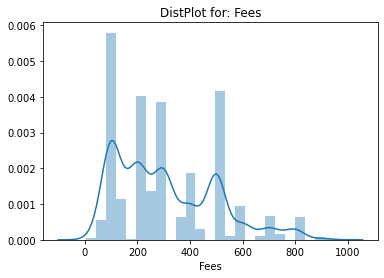

In [25]:
#Checking data distribution in target feature Fees
x = 'Fees'
sns.distplot(df_new[x])
plt.title(f"DistPlot for: {x}")
plt.show()

### Remarks:
- Most of the fees lies between 100 to 500.
- Data is not distributed normally.

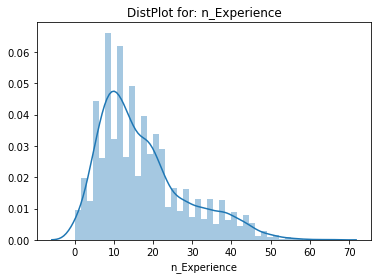

In [26]:
#Checking data distribution in n_Experience
x = 'n_Experience'
sns.distplot(df_new[x])
plt.title(f"DistPlot for: {x}")
plt.show()

### Remarks:
- Most of the experience lies between 5 to 28 years.
- Data is somewhat distributed normally but not in well curve.

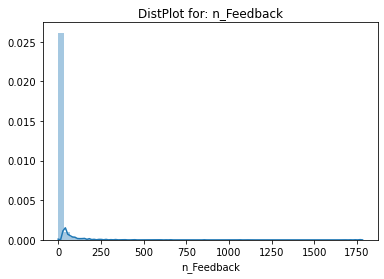

In [27]:
#Checking data distribution in n_Feedback
x = 'n_Feedback'
sns.distplot(df_new[x])
plt.title(f"DistPlot for: {x}")
plt.show()

### Remarks:
- Most of the doctors have 0 or no feedback.
- Data is not ditributed normally.
- data is right skewed and needs to be treated accordingly.

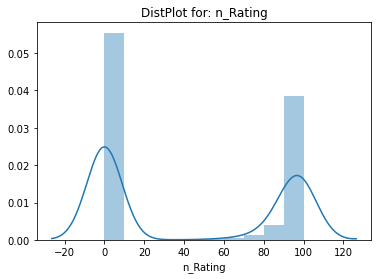

In [28]:
#Checking data distribution in n_Rating
x = 'n_Rating'
sns.distplot(df_new[x])
plt.title(f"DistPlot for: {x}")
plt.show()

### Remarks:
- Most of the doctors have 0 or no rating.
- data is not distributed normally and needs to be treated accordingly.

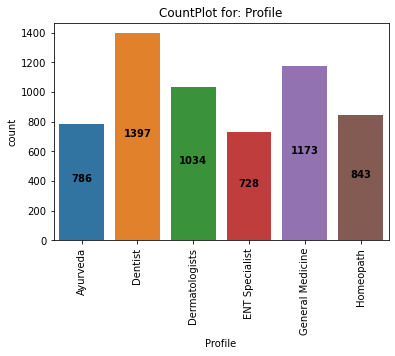

In [29]:
#Checking feature Profile using countplot
x = 'Profile'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Maximum number of obersvations are for Dentist while minimum are for ENT Specialist.
- Majority of observations are for Profile Dentist, General Medicine and Dermatologists.

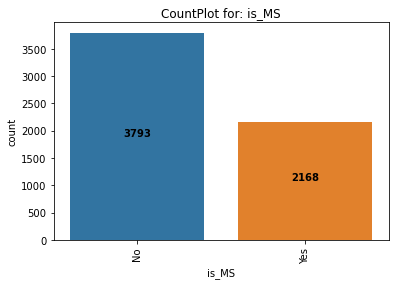

In [30]:
#Checking feature is_MS using countplot
x = 'is_MS'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no MS degree while few of them have MS.

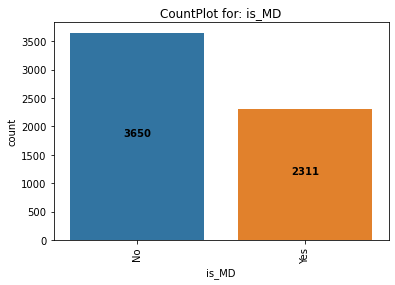

In [31]:
#Checking feature is_MD using countplot
x = 'is_MD'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no MD degree while few of them have MD.

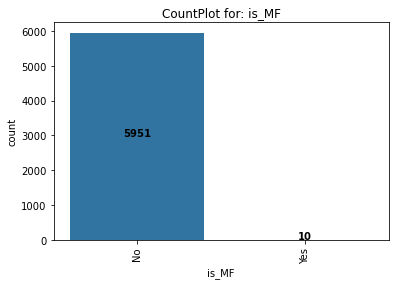

In [32]:
#Checking feature is_MF using countplot
x = 'is_MF'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no MF degree while few of them have MF.

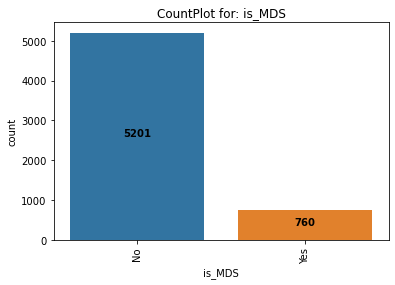

In [33]:
#Checking feature is_MDS using countplot
x = 'is_MDS'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no MDS degree while few of them have MDS.

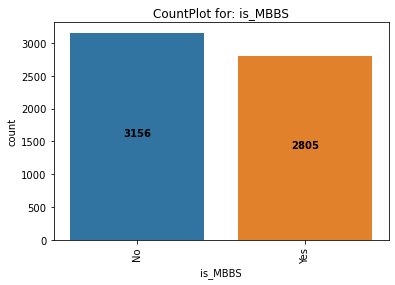

In [34]:
#Checking feature is_MBBS using countplot
x = 'is_MBBS'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no MBBS degree while few of them have MBBS.

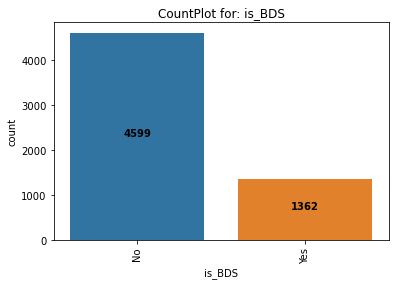

In [35]:
#Checking feature is_BDS using countplot
x = 'is_BDS'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no BDS degree while few of them have BDS.

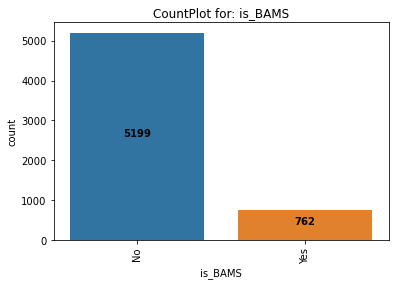

In [36]:
#Checking feature is_BAMS using countplot
x = 'is_BAMS'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no BAMS degree while few of them have BAMS.

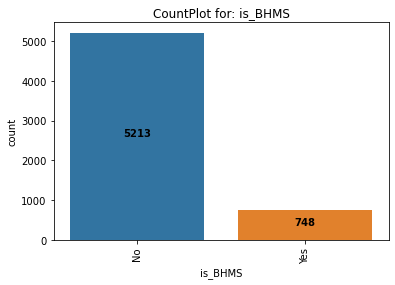

In [37]:
#Checking feature is_BHMS using countplot
x = 'is_BHMS'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no BHMS degree while few of them have BHMS.

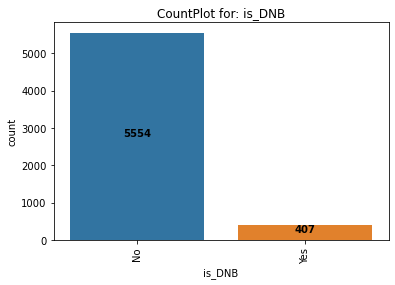

In [38]:
#Checking feature is_DNB using countplot
x = 'is_DNB'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no DNB degree while few of them have DNB.

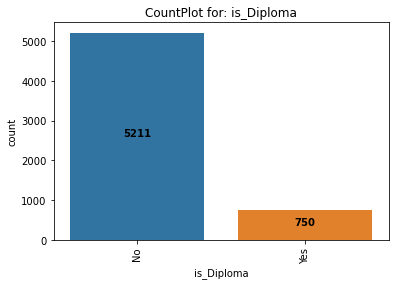

In [39]:
#Checking feature is_Diploma using countplot
x = 'is_Diploma'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no Diploma while few of them have Diploma.

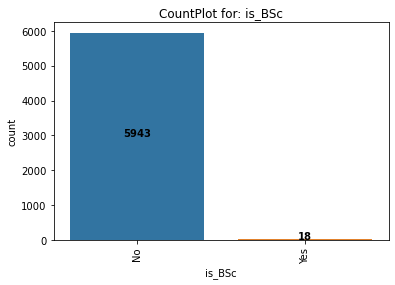

In [40]:
#Checking feature is_BSc using countplot
x = 'is_BSc'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Most of the doctors have no BSc while few of them have BSc.

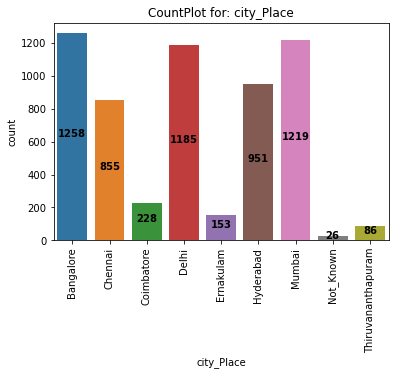

In [41]:
#Checking feature city_Place using countplot
x = 'city_Place'
ax = sns.countplot(df_new[x])
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,i.get_height(), ha='center', fontweight='bold')
    k += 1
plt.title(f"CountPlot for: {x}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Maximum number of observations are from city Banglore while mininum is from Not_Known.
- Majority of observations are among Banglore, Chennai, Delhi, Hyderabad and Mumbai.

## Bi-Variate Analysis

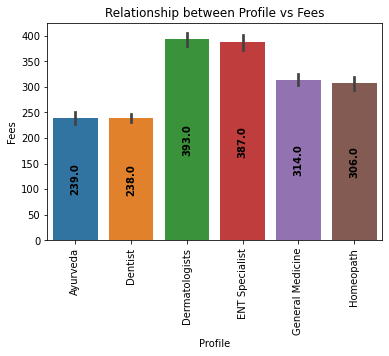

In [42]:
#Checking relationship between Profile and Fees
x = 'Profile'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Maximum number of fees is for Dermatologists and minimum is for Dentist.
- Most of the fees lies among Homeopath, ENT Specialist, General Medicine and Dermatologists.

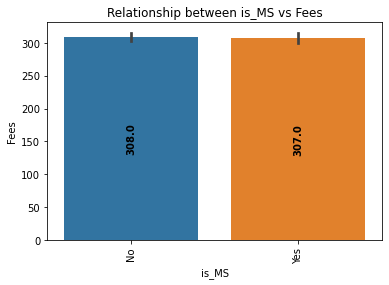

In [43]:
#Checking relationship between Profile and Fees
x = 'is_MS'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with MS has highest fees as compared to others with no MS.

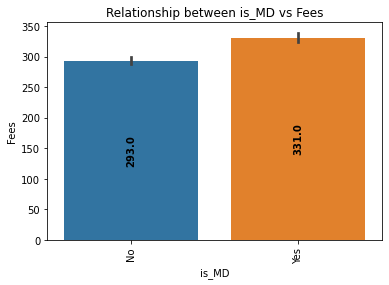

In [44]:
#Checking relationship between is_MD and Fees
x = 'is_MD'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with MD has highest fees as compared to others with no MD.

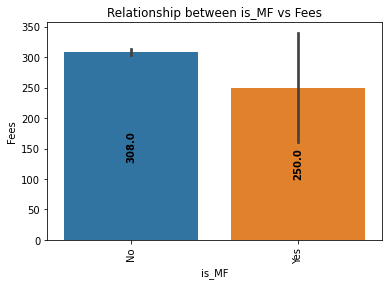

In [45]:
#Checking relationship between is_MF and Fees
x = 'is_MF'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with MF has lowest fees as compared to others with no MF.

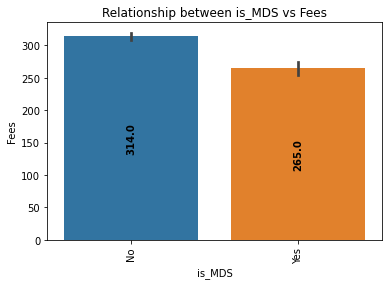

In [46]:
#Checking relationship between is_MDS and Fees
x = 'is_MDS'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with MDS has lowest fees as compared to others with no MDS.

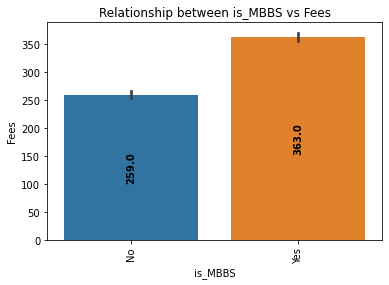

In [47]:
#Checking relationship between is_MBBS and Fees
x = 'is_MBBS'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with MBBS has highest fees as compared to others with no MBBS.

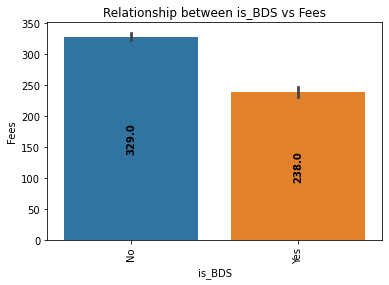

In [48]:
#Checking relationship between is_BDS and Fees
x = 'is_BDS'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with BDS has lowest fees as compared to others with no BDS.

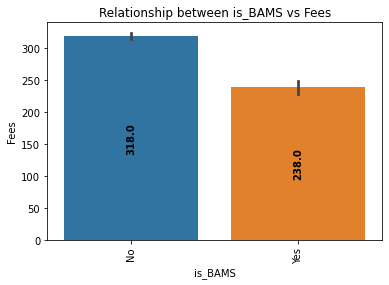

In [49]:
#Checking relationship between is_BAMS and Fees
x = 'is_BAMS'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with BAMS has lowest fees as compared to others with no BAMS.

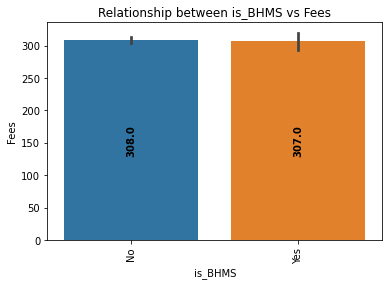

In [50]:
#Checking relationship between is_BHMS and Fees
x = 'is_BHMS'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with BHMS has highest fees as compared to others with no BHMS.

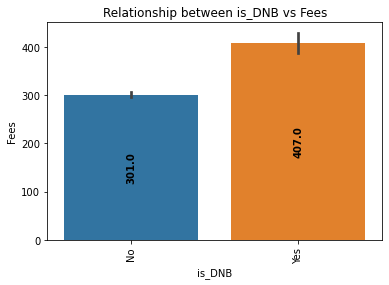

In [51]:
#Checking relationship between is_DNB and Fees
x = 'is_DNB'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with DNB has highest fees as compared to others with no DNB.

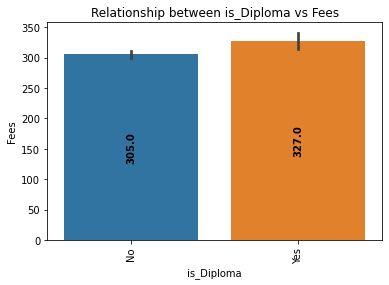

In [52]:
#Checking relationship between is_Diploma and Fees
x = 'is_Diploma'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with Diploma has highest fees as compared to others with no Diploma.

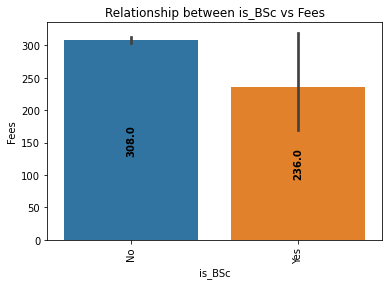

In [53]:
#Checking relationship between is_BSc and Fees
x = 'is_BSc'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors with BSc has lowest fees as compared to others with no BSc.

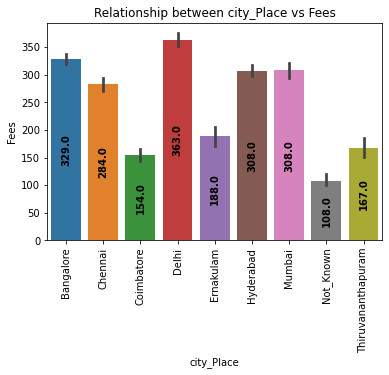

In [54]:
#Checking relationship between city_Place and Fees
x = 'city_Place'
y = 'Fees'
ax = sns.barplot(x,y,data=df_new)
k=0
for i in ax.patches:
    h = round(i.get_height(),0)
    plt.text(k,h/2,h,ha='center',va='center',fontweight='bold',rotation=90)
    k += 1
plt.title(f"Relationship between {x} vs {y}")
plt.xticks(ticks=range(len(le[x].classes_)),labels=le[x].classes_,rotation=90)
plt.show()

### Remarks:
- Doctors in Delhi has higher fees while in Coimbatore has lower fees.
- Majority of high fees doctors are among Bangalore, Chennai, Delhi, Hyderabad and Mumbai.

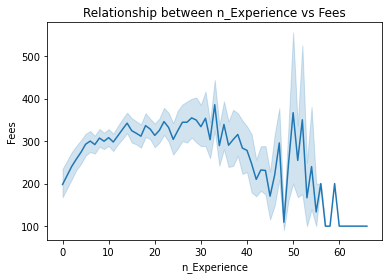

In [55]:
#Checking relationship between n_Experience and Fees
x = 'n_Experience'
y = 'Fees'

sns.lineplot(x,y,data=df_new)
plt.title(f"Relationship between {x} vs {y}")
plt.show()

### Remarks:
- Fess increases from 0 to 33 years and then decreases from 34 to 60 years.

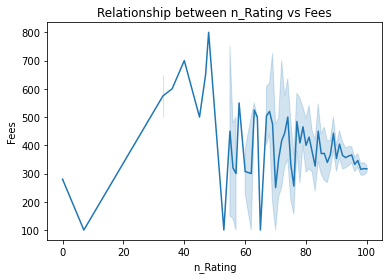

In [56]:
#Checking relationship between n_Rating and Fees
x = 'n_Rating'
y = 'Fees'

sns.lineplot(x,y,data=df_new)
plt.title(f"Relationship between {x} vs {y}")
plt.show()

### Remarks:
- Fess increases from 0 to 50 rating and then starts decreasing as rating increases.

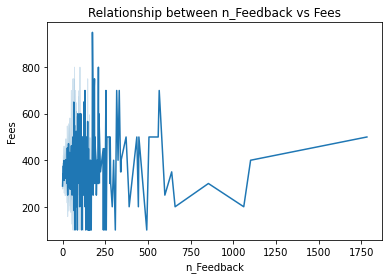

In [57]:
#Checking relationship between n_Feedback and Fees
x = 'n_Feedback'
y = 'Fees'

sns.lineplot(x,y,data=df_new)
plt.title(f"Relationship between {x} vs {y}")
plt.show()

### Remarks:
- As feeback increase, fees tends to remain between 250 to 500.

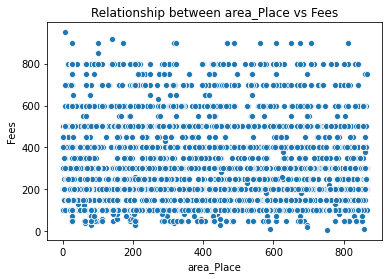

In [58]:
#Checking relationship between n_Feedback and Fees
x = 'area_Place'
y = 'Fees'

sns.scatterplot(x,y,data=df_new)
plt.title(f"Relationship between {x} vs {y}")
plt.show()

### Remarks:
- In most of area, fees lies between 100 to 800.

# Multivariate Analysis

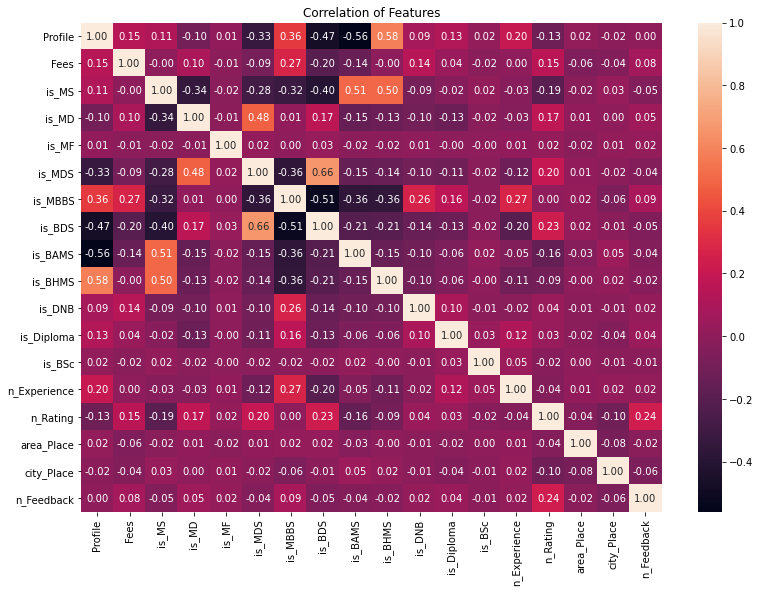

In [59]:
#Checking correlation of features and interpreting them using heatmap
df_corr = df_new.corr()
plt.figure(figsize=(13,9))
sns.heatmap(df_corr,annot=True,fmt='.2f')
plt.title("Correlation of Features")
plt.show()

### Remarks:
- Feature n_Rating, is_DNB, is_MBBS, is_MS and Profile has good correlation with Fees while others have weak correlation.

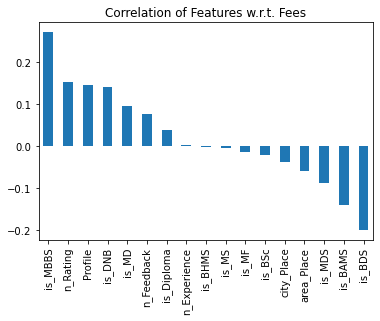

In [60]:
#Checking correlation of feature w.r.t Fees using barplot
df_corr['Fees'].sort_values(ascending=False).drop('Fees').plot.bar()
plt.title("Correlation of Features w.r.t. Fees")
plt.show()

### Remarks:
- From feature n_Rating to n_Experience, are positively correlated while from is_BAMS to is_MDS are negatively correlated to Fees.

# Preparing Data for Model

In [61]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, power_transform

## 1. Removing Outliers

In [62]:
#Checking outlier using zscore (threshold -3 to +3)
z = np.abs(zscore(df_new))

#Printing location of outliers
np.where(z>3)

(array([   3,    9,   10,   14,   17,   20,   21,   38,   49,   58,  105,
         110,  138,  140,  147,  169,  173,  183,  204,  222,  228,  243,
         252,  257,  262,  275,  276,  280,  284,  293,  293,  315,  325,
         329,  345,  372,  417,  425,  437,  445,  449,  450,  454,  463,
         472,  488,  530,  548,  548,  560,  574,  595,  631,  654,  680,
         698,  713,  731,  751,  754,  756,  757,  770,  774,  777,  786,
         798,  820,  820,  837,  849,  855,  878,  882,  890,  901,  942,
         961,  987,  987, 1009, 1017, 1022, 1027, 1034, 1063, 1067, 1092,
        1098, 1108, 1111, 1141, 1150, 1152, 1165, 1178, 1186, 1189, 1204,
        1250, 1252, 1259, 1263, 1275, 1298, 1300, 1303, 1314, 1323, 1325,
        1327, 1335, 1338, 1350, 1358, 1375, 1419, 1423, 1426, 1427, 1469,
        1475, 1477, 1479, 1491, 1492, 1534, 1536, 1556, 1566, 1570, 1583,
        1587, 1599, 1612, 1620, 1631, 1652, 1656, 1674, 1705, 1708, 1724,
        1728, 1755, 1768, 1770, 1777, 

In [63]:
#Removing outliers
df_wo = df_new[(z<=3).all(axis=1)]

print(f"Original Shape: {df_new.shape}")
print(f"New Shape: {df_wo.shape}")
print(f"% Loss: {(len(df_new)-len(df_wo))*100/len(df_new)}%")

Original Shape: (5961, 18)
New Shape: (5406, 18)
% Loss: 9.310518369401107%


### Remarks:
- Since, the % Loss of data is more than 5, therefore, discarding the dataset without outliers and proceeding with original data.

## 2. Skewness

In [64]:
#Checking skewness in continueous data
con_feature = df_new.columns[df_new.dtypes != 'int32']
df_new[con_feature].skew()

Fees             0.751870
n_Experience     0.991089
n_Rating         0.247186
n_Feedback      15.552419
dtype: float64

### Remarks:
- Feature n_Experience and n_Feedback has skewed data and needs to be treated.

In [65]:
#Removing skewness using power_transform
df_t = df_new.copy()
for i in con_feature:
    if np.abs(df_t[i].skew())>0.8:
        df_t[i] = power_transform(np.array(df_new[i]).reshape(-1,1))
        
#Re-Checking skewness
df_t[con_feature].skew()

Fees            0.751870
n_Experience    0.000692
n_Rating        0.247186
n_Feedback      1.135436
dtype: float64

## 3. Seperating Input and Output/Target Variables

In [66]:
x = df_t.drop(columns=['Fees']) #Input Variables
y = df_t['Fees'] #Output/Target Variable

print(x.shape)
print(y.shape)

(5961, 17)
(5961,)


## 4. Scaling Data for Model

In [67]:
#Scaling data for model using StandardScaler
sc = StandardScaler()
scaled_x = x.copy()
#scaling contineous data
for i in x:
    if x[i].dtypes == 'int64':
        scaled_x[i] = sc.fit_transform(np.array(x[i]).reshape(-1,1))
        

# Finding Best Model

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [69]:
import timeit
#Defining function for best random state
def get_best_rstate(r,model,x,y,test_size=0.25):
    best_rState = 0
    best_mScore = 0
    for i in r:
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=i)
        
        model.fit(x_train,y_train)
        predict_y = model.predict(x_test)
        
        temp_r2Score = r2_score(y_test,predict_y)
        if temp_r2Score>best_mScore:
            best_mScore = temp_r2Score
            best_rState = i
            
    return best_rState,best_mScore


#Defining function for best CV
def get_best_cv(model,parameters,x_train,y_train,r=range(2,20)):
    best_cv = 0
    best_cvScore = 0
    for i in r:
        gscv = GridSearchCV(model,parameters)
        gscv.fit(x_train,y_train)
        
        temp_cvScore = cross_val_score(gscv.best_estimator_,x_train,y_train,cv=i).mean()
        
        if i == 2:
            best_cvScore = temp_cvScore
            best_cv = i
            
        if temp_cvScore>best_cvScore:
            best_cvScore = temp_cvScore
            best_cv = i
          
    return best_cv,best_cvScore

#Defining function for building models
def build_model(models,x,y,r_range=range(100),t_size=0.25,cv_range=range(2,20)):
    for i in models:
        print(f"Processing {i}...")
        
        #Start time
        start_time = timeit.default_timer()
        
        #Finding the best random_state for train test split
        best_rState, best_mScore = get_best_rstate(r_range,models[i]["name"],x,y)
        
        #Splitting train test data with best random_state
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=t_size,random_state=best_rState)
        
        #Hypertuning Parameters
        #Finding best CV
        best_cv, best_cvScore = get_best_cv(models[i]["name"],models[i]["parameters"],x_train,y_train,cv_range)
        
        #Building final model with hypertuned parameters
        gscv = GridSearchCV(models[i]["name"],models[i]["parameters"],cv=best_cv)
        gscv.fit(x_train,y_train)
        
        #End time
        end_time = timeit.default_timer()
        
        #Checking Final Performance of the model
        predict_y = gscv.best_estimator_.predict(x_test)
        
        r2Score = r2_score(y_test,predict_y)
        mse = mean_squared_error(y_test,predict_y)
        mae = mean_absolute_error(y_test,predict_y)
        
        #Storing metrics
        models[i]['initial_r2_score'] = best_mScore
        models[i]['r2_score'] = r2Score
        models[i]['mse'] = mse
        models[i]['mae'] = mae
        models[i]['rmse'] = np.sqrt(mse)
        
        #Storing model specs.
        models[i]["random_state"] = best_rState
        models[i]["x_train"] = x_train
        models[i]["x_test"] = x_test
        models[i]["y_train"] = y_train
        models[i]["y_test"] = y_test
        models[i]["cv"] = best_cv
        models[i]["cross_val_score"] = best_cvScore
        models[i]["gscv"] = gscv
        models[i]["predict_y"] = predict_y
        models[i]["build_time"] = end_time - start_time
        
        print(f"\tCompleted: [in {end_time-start_time}s]\n")
    return models;

## Preparing Model List and Testing to get Best Model

In [70]:
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Preparing List of Models with parameters
models = {
    "LinearRegression":{
        "name": LinearRegression(),
        "parameters":{
            "fit_intercept": [True,False],
            "normalize": [True,False]
        }
    },
    "Lasso":{
        "name": Lasso(),
        "parameters":{
            "alpha": [0.0001,0.001],
            "fit_intercept": [True,False],
            "selection": ['cyclic','random']
        }
    },
    "DecisionTreeRegressor":{
        "name": DecisionTreeRegressor(),
        "parameters":{
            "criterion": ['mse','friedman_mse'],
            "splitter": ['best','random']
        }
    },
    "KNeighborsRegressor":{
        "name": KNeighborsRegressor(),
        "parameters":{
            "weights": ['uniform','distance'],
            "algorithm": ['ball_tree','kd_tree','brute']
        }
    }
}

In [71]:
#Building and Testing models
build_models = build_model(models,scaled_x,y)

Processing LinearRegression...
	Completed: [in 12.527491800000007s]

Processing Lasso...
	Completed: [in 52.950614200000004s]

Processing DecisionTreeRegressor...
	Completed: [in 29.419438999999997s]

Processing KNeighborsRegressor...
	Completed: [in 77.31575179999999s]



In [72]:
#Displaying model performance and comparing it to select the best model.
model_names = []
model_r2Scores = []
model_cvScores = []
model_buildTimes = []
for i in build_models:
    model = build_models[i]
    print(f"START: {i}\n")
    print(f"\tBest random_state: {model['random_state']} with best r2_score: {model['initial_r2_score']}\n")
    print(f"\tBest CV: {model['cv']} with best cross_val_score: {model['cross_val_score']}\n")
    print(f"\tBest Parameters: {model['gscv'].best_params_}\n\n")
    print(f"----Final Performance----")
    print(f"R2 Score: {round(model['r2_score']*100,2)}%\n")
    print(f"MSE: {model['mse']}\n")
    print(f"RMSE:{model['rmse']}\n")
    print(f"MAE: {model['mae']}\n")
    print(f"BuildTime: {model['build_time']}\n")
    print(f"END: {i}\n\n\n")
    
    model_names.append(i)
    model_r2Scores.append(model['r2_score'])
    model_cvScores.append(model['cross_val_score'])
    model_buildTimes.append(model['build_time'])
    
d_cmp = pd.DataFrame({"Name":model_names,"r2_score":model_r2Scores,"cross_val_score":model_cvScores,"build_time(sec)":model_buildTimes})
d_cmp['Difference'] = d_cmp['r2_score']-d_cmp['cross_val_score']
d_cmp

START: LinearRegression

	Best random_state: 27 with best r2_score: 0.1838401597088426

	Best CV: 4 with best cross_val_score: 0.13019412239861852

	Best Parameters: {'fit_intercept': True, 'normalize': False}


----Final Performance----
R2 Score: 18.38%

MSE: 29660.44502161776

RMSE:172.22208052865278

MAE: 137.79683551278555

BuildTime: 12.527491800000007

END: LinearRegression



START: Lasso

	Best random_state: 89 with best r2_score: 0.17728381708258223

	Best CV: 6 with best cross_val_score: 0.1316693126079199

	Best Parameters: {'alpha': 0.001, 'fit_intercept': True, 'selection': 'cyclic'}


----Final Performance----
R2 Score: 18.28%

MSE: 28737.388324363015

RMSE:169.52105569622617

MAE: 136.89791350894578

BuildTime: 52.950614200000004

END: Lasso



START: DecisionTreeRegressor

	Best random_state: 0 with best r2_score: 0

	Best CV: 6 with best cross_val_score: -0.5225453874101459

	Best Parameters: {'criterion': 'mse', 'splitter': 'random'}


----Final Performance----
R2 Sco

,Name,r2_score,cross_val_score,build_time(sec),Difference
0,LinearRegression,0.183840,0.130194,12.527492,0.053646
1,Lasso,0.182848,0.131669,52.950614,0.051179
2,DecisionTreeRegressor,-0.558217,-0.522545,29.419439,-0.035671
3,KNeighborsRegressor,0.187478,0.074009,77.315752,0.113469


### Remarks:
- From about tested models, KNeighborsRegressor performs better with r2_score: 18.75% and cross_val_score: 0.07%.

# Model Saving or Serialization

In [73]:
import joblib
#Saving final model
final_model = build_models['KNeighborsRegressor']
filename = 'doctor_consultation_fee.obj'
joblib.dump(final_model['gscv'].best_estimator_,open(filename,'wb'))

# Conclusion

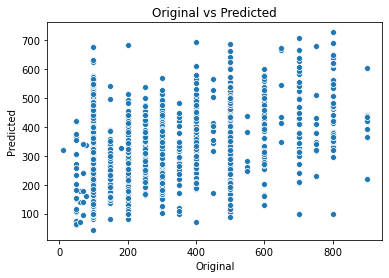

In [74]:
#Ploting Original and Predicted data on scatterplot
original = final_model['y_test']
predict = final_model['predict_y']
sns.scatterplot(original,predict)
plt.title("Original vs Predicted")
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

### Final Remarks:
> Final model, KNeighborsRegressor performs with r2_score: 18.75% and cross_val_score: 0.07% and can be improved further by training with more specific data.

# Model Prediction for Test Data

## Preprocessing Pipeline:

- Load Test Dataset
- Extract Informations from feature:
    - Qualification (is_MS, is_MD, is_MF, is_MDS, is_MBBS, is_BDS, is_BAMS, is_BHMS, is_DNB, is_Diploma, is_BSc)
    - Experience (n_Experience)
    - Rating (n_Rating)
    - Place (area_Place, city_Place)
    - Miscellaneous_Info (n_Feedback)
- Treat Null Values
- Encode Discrete Features (useing LabelEncoder)
- Remove Outliers using zscore
- Treat skewness in contineous features using power_transform
- Scale contineous feature data using StandardScaler
- Load Serialized Model and Make Prediction for Test Data

In [75]:
#1. Loading Test Data
df_ft = pd.read_excel('Final_Test.xlsx',sheet_name='Sheet1')

#Copying dataset to anothor df object
df_test = df_ft.copy()

#2. Extracting Information

##from Qualification
x = 'Qualification'
#Preparing list of degrees
deg = ['MS','MD','MF','MDS','MBBS','BDS','BAMS','BHMS','DNB']
pgd = ['PGD','Post Graduate','Diploma']
bsc = ['BSc','B.Sc']

#Seperating using deg first
for i in deg:
    temp = 'is_'+i
    df_test[temp] = df_test[x].str.contains(i)
    df_test[temp] = df_test[temp].apply(lambda x: 'Yes' if x==True else 'No')

#Seperating using pgd
for i in pgd:
    df_test[i] = df_test[x].str.contains(i)
    
df_test['is_Diploma'] = df_test[pgd].any(axis=1)
df_test.drop(columns=pgd,inplace=True)
df_test['is_Diploma'] = df_test['is_Diploma'].apply(lambda x: 'Yes' if x==True else 'No')

#Seperating using bsc
for i in bsc:
    df_test[i] = df_test[x].str.contains(i)
    
df_test['is_BSc'] = df_test[bsc].any(axis=1)
df_test.drop(columns=bsc,inplace=True)
df_test['is_BSc'] = df_test['is_BSc'].apply(lambda x: 'Yes' if x==True else 'No')

##from Experience
x='Experience'
reg = '\.*(\d{0,9})\.*'
df_test['n_Experience']=df_test[x].str.extract(reg).astype('int64')

##from Rating
x='Rating'
reg = '\.*(\d{0,9})\.*'
df_test['n_Rating']=df_test[x].str.extract(reg)

##from Place
x='Place'
#Seperating feature Place into columns area_Place and city_Place
temp_df = df_test[x].str.split(',',expand=True)
df_test['area_Place'] = temp_df[0].str.strip()
df_test['city_Place'] = temp_df[1].str.strip()

##from Miscellaneous_Info
#Extracting number of feedbacks from feature Miscellaneous_Info and storing it into column n_Feedback
x='Miscellaneous_Info'
reg = '\.*(\d{0,9})\sFeedback\.*'
temp = df_test[x].str.extract(reg)
df_test['n_Feedback'] = temp

##Dropping Features
df_test_new = df_test.drop(columns=['Qualification','Experience','Rating','Place','Miscellaneous_Info'])

#3. Treating Null Values

#Treating null values in n_Rating
df_test_new['n_Rating'].replace(np.nan,0,inplace=True)

#Treating null values in area_Place
df_test_new['area_Place'].replace(np.nan,'Not_Known',inplace=True)

#Treating null values in city_Place
df_test_new['city_Place'].replace(np.nan,'Not_Known',inplace=True)

#Treating null values in n_Feedback
df_test_new['n_Feedback'].replace(np.nan,0,inplace=True)

#Converting data type of feature n_Rating and n_Feedback to int type.
df_test_new['n_Rating'] = df_test_new['n_Rating'].astype('int64')
df_test_new['n_Feedback'] = df_test_new['n_Feedback'].astype('int64')

#4. Encoding Features
#Encoding categorical features
cat_feature = df_test_new.columns[df_test_new.dtypes == object]
le_test = {}
encoded_value = {}
for i in cat_feature:
    le_test[i] = LabelEncoder()
    encoded_value[i] = le_test[i].fit_transform(df_test_new[i])
    print(i)
    print(le_test[i].classes_)
    print('\n')
    
#Replacing encoded value
df_test_enc = df_test_new.copy()
for i in encoded_value:
    df_test_enc[i]=encoded_value[i]
    
#5. Removing Outliers
z = np.abs(df_test_enc)
df_test_wo = df_test_enc[(z<=3).all(axis=1)]
loss = (len(df_test)-len(df_test_wo))*100/len(df_test)
if loss <= 5:
    df_proceed = df_test_wo
else:
    df_proceed = df_test_enc
    
#6. Treating skewness in continueous features using power_transform
cont_feature = df_proceed.columns[df_proceed.dtypes == 'int64']
df_t = df_proceed.copy()
for i in cont_feature:
    if np.abs(df_t[i].skew()) > 0.5:
        df_t[i] = power_transform(np.array(df_proceed[i]).reshape(-1,1))
        
#7. Scaling contineous feature data using StandardScaler
sc_test = StandardScaler()
x_test_scaled = df_t.copy()
for i in cont_feature:
    x_test_scaled[i] = sc_test.fit_transform(np.array(df_t[i]).reshape(-1,1))
    


Profile
['Ayurveda' 'Dentist' 'Dermatologists' 'ENT Specialist' 'General Medicine'
 'Homeopath']


is_MS
['No' 'Yes']


is_MD
['No' 'Yes']


is_MF
['No' 'Yes']


is_MDS
['No' 'Yes']


is_MBBS
['No' 'Yes']


is_BDS
['No' 'Yes']


is_BAMS
['No' 'Yes']


is_BHMS
['No' 'Yes']


is_DNB
['No' 'Yes']


is_Diploma
['No' 'Yes']


is_BSc
['No' 'Yes']


area_Place
['AS Rao Nagar' 'Abbigere' 'Abhiramapuram' 'Abids' 'Adambakkam'
 'Adarsh Nagar' 'Adyar' 'Agaram' 'Alaknanda' 'Alipur' 'Aluva' 'Alwal'
 'Alwarpet' 'Ambalamukku' 'Ambattur' 'Ameerpet' 'Aminjikarai' 'Anand Lok'
 'Anand Vihar' 'Andheri' 'Andheri East' 'Andheri West' 'Angamaly'
 'Anna Nagar' 'Anna Nagar East' 'Anna Nagar West' 'Arekere' 'Aroor'
 'Arumbakkam' 'Ashok Nagar' 'Ashok Vihar' 'Attapur' 'August Kranti Marg'
 'Aya Nagar' 'Ayanambakkam' 'Ayanavaram' 'Ayyappankavu' 'BHEL'
 'BTM Layout' 'BTM Layout 1st Stage' 'BTM Layout 2nd Stage' 'Bachupally'
 'Badarpur' 'Bakkarwala' 'Balanagar' 'Balapur' 'Bali Nagar' 'Balkampet'
 'Banashankari' 'Bana

#### 8. Loading Serialized Model and Making Prediction on Test Data

In [76]:
model_file_name = 'doctor_consultation_fee.obj'
loaded_model = joblib.load(model_file_name)

#Predicting Test Data
predict_test = loaded_model.predict(x_test_scaled)

#Displaying Predicted Data
pred_t = pd.DataFrame({"Predicted_Data": predict_test})
pred_t

,Predicted_Data
0,333.099778
1,422.086518
2,100.000000
3,267.794516
4,463.041456
...,...
1982,176.164164
1983,365.842164
1984,317.251390
1985,405.588010


In [77]:
## Saving predicted data to .csv file
pred_t.to_csv('predicted_test_data.csv')